<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mod-4-Project---Pneumonia-Detection" data-toc-modified-id="Mod-4-Project---Pneumonia-Detection-1">Mod 4 Project - Pneumonia Detection</a></span><ul class="toc-item"><li><span><a href="#Pneumonia" data-toc-modified-id="Pneumonia-1.1">Pneumonia</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1.2">Methodology</a></span></li><li><span><a href="#What-is-a-Convolutional-Neural-Network(CNN)" data-toc-modified-id="What-is-a-Convolutional-Neural-Network(CNN)-1.3">What is a Convolutional Neural Network(CNN)</a></span></li><li><span><a href="#Base-Model" data-toc-modified-id="Base-Model-1.4">Base Model</a></span></li><li><span><a href="#Improved-Model" data-toc-modified-id="Improved-Model-1.5">Improved Model</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.6">Summary</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.7">Conclusion</a></span></li><li><span><a href="#Recommendations:" data-toc-modified-id="Recommendations:-1.8">Recommendations:</a></span></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-1.9">Future Work</a></span></li></ul></li></ul></div>

## Mod 4 Project - Pneumonia Detection
- __Student name: Vidya Menon and Chamila Dharmawardhana__  
- __Student pace: Full time__  
- __Scheduled project review date: June 29, 2020__  
- __Instructor name: Amber Yandow__

### Pneumonia  
__Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in 
the air sacs in your lungs, which are called alveoli. The alveoli fill with fluid or pus, making it difficult to breathe.__

![](img/Pneumonia.jpg)

### Methodology     

__ROSEMED Methodology__ - This is the one of the most straightforward of the Data Science processes.  
R - Research O - Obtain S - Scrub E - Explore M - Model E - Evaluate D - Deploy  

During this process,the stages often blur together. It is completely acceptable (and often a best practice!) to float back 
and forth between stages as you learn new things about your problem, dataset, requirements, etc. It's quite common to get to
the modeling step and realize that you need to scrub your data a bit more or engineer a different feature and jump back to 
the "Scrub" stage, or go all the way back to the "Obtain" stage when you realize your current data isn't sufficient to solve
this problem. As with any of the frameworks, this methodology is meant to be treated more like a set of guidelines for 
structuring your project than set-in-stone steps that cannot be violated.

__Research__ - Find out about various models and see which model works best for our data.  
__Obtain__ - This step involves understanding stakeholder requirements, gathering information on the problem, and finally, 
sourcing data that we think will be necessary for solving this problem.  
__Scrub__ - During this stage, we focus on preprocessing our data. Important steps such as identifying and removing null 
values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.  
__Explore__ - During this step, we create visualizations to really get a feel of the dataset. We focus on things such as 
understanding the distribution of different columns, checking for multicollinearity, and other tasks like that.  
__Model__ - It consists of building and tuning models using all the tools we have in our data science toolbox. In practice, 
this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning 
the ones that show promise to try and increase our results.  
__Evaluate__ - During this step, we interpret the results of models, and communicate results to stakeholders. If the results
are satisfactory to all stakeholders involved, we go from this stage right into putting the model into production and 
automating processes necessary to support it.  
__Deploy__ - Deploying the Model.

In [449]:
# Importing Libraries

import numpy as np 
import pandas as pd
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import chain
from random import sample

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import keras
from sklearn.metrics import classification_report, confusion_matrix

# Deep learning libraries
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers, regularizers

# src 
from src import plots

In [541]:
train_data_dir = ('data/train')
test_data_dir = ('data/test')
val_data_dir = ('data/val')

__Our data has 3 folders:  
train - contains the data for training our model.  
val - contains images which we will use to validate our model. The purpose of this data set is to prevent our model from Overfitting.  
test - contains the data to test the model once it has learned the relationships between the images and their label (Pneumonia/Not-Pneumonia)__

In [433]:

# Get all the data in the directory data/test , and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(train_data_dir, 
        target_size=(150, 150), batch_size=32,class_mode='binary',seed=42)

# Get all the data in the directory data/train, and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_data_dir, 
        target_size=(150, 150), batch_size=624,class_mode='binary',seed=42)

# Get all the data in the directory data/val, and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_data_dir, 
        target_size=(150, 150), batch_size=32,class_mode='binary',seed=42)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 624 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [434]:
input_path = 'data/'

# Distribution of our datasets
for _set in ['train', 'val', 'test']:
    n_normal = len(os.listdir(input_path + _set + '/NORMAL'))
    n_infect = len(os.listdir(input_path + _set + '/PNEUMONIA'))
    print('In the Set: {}, normal images: {}, pneumonia images: {}'.format(_set, n_normal, n_infect))

In the Set: train, normal images: 1341, pneumonia images: 3875
In the Set: val, normal images: 8, pneumonia images: 8
In the Set: test, normal images: 234, pneumonia images: 390


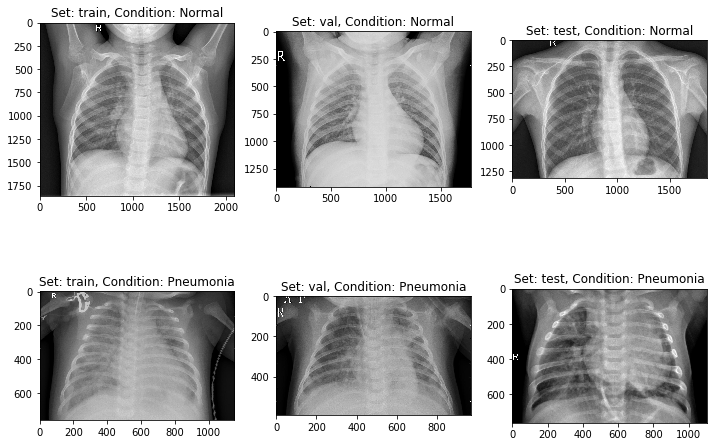

In [435]:
# Preview the images in the file
fig, ax = plt.subplots(2, 3, figsize=(10, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: Pneumonia'.format(_set))

In [438]:
#Checking the shapes
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(32, 150, 150, 3)
(32,)
(624, 150, 150, 3)
(624,)


In [441]:
np.unique(test_labels)
#array_to_img(test_images[7])

array([0., 1.], dtype=float32)


![]('/Users/Vidya/Flatiron/Mod4Project/dsc-mod-4-project-v2-1-onl01-dtsc-ft-030220/chest_xray/train/NORMAL/IM-0115-0001.jpeg')

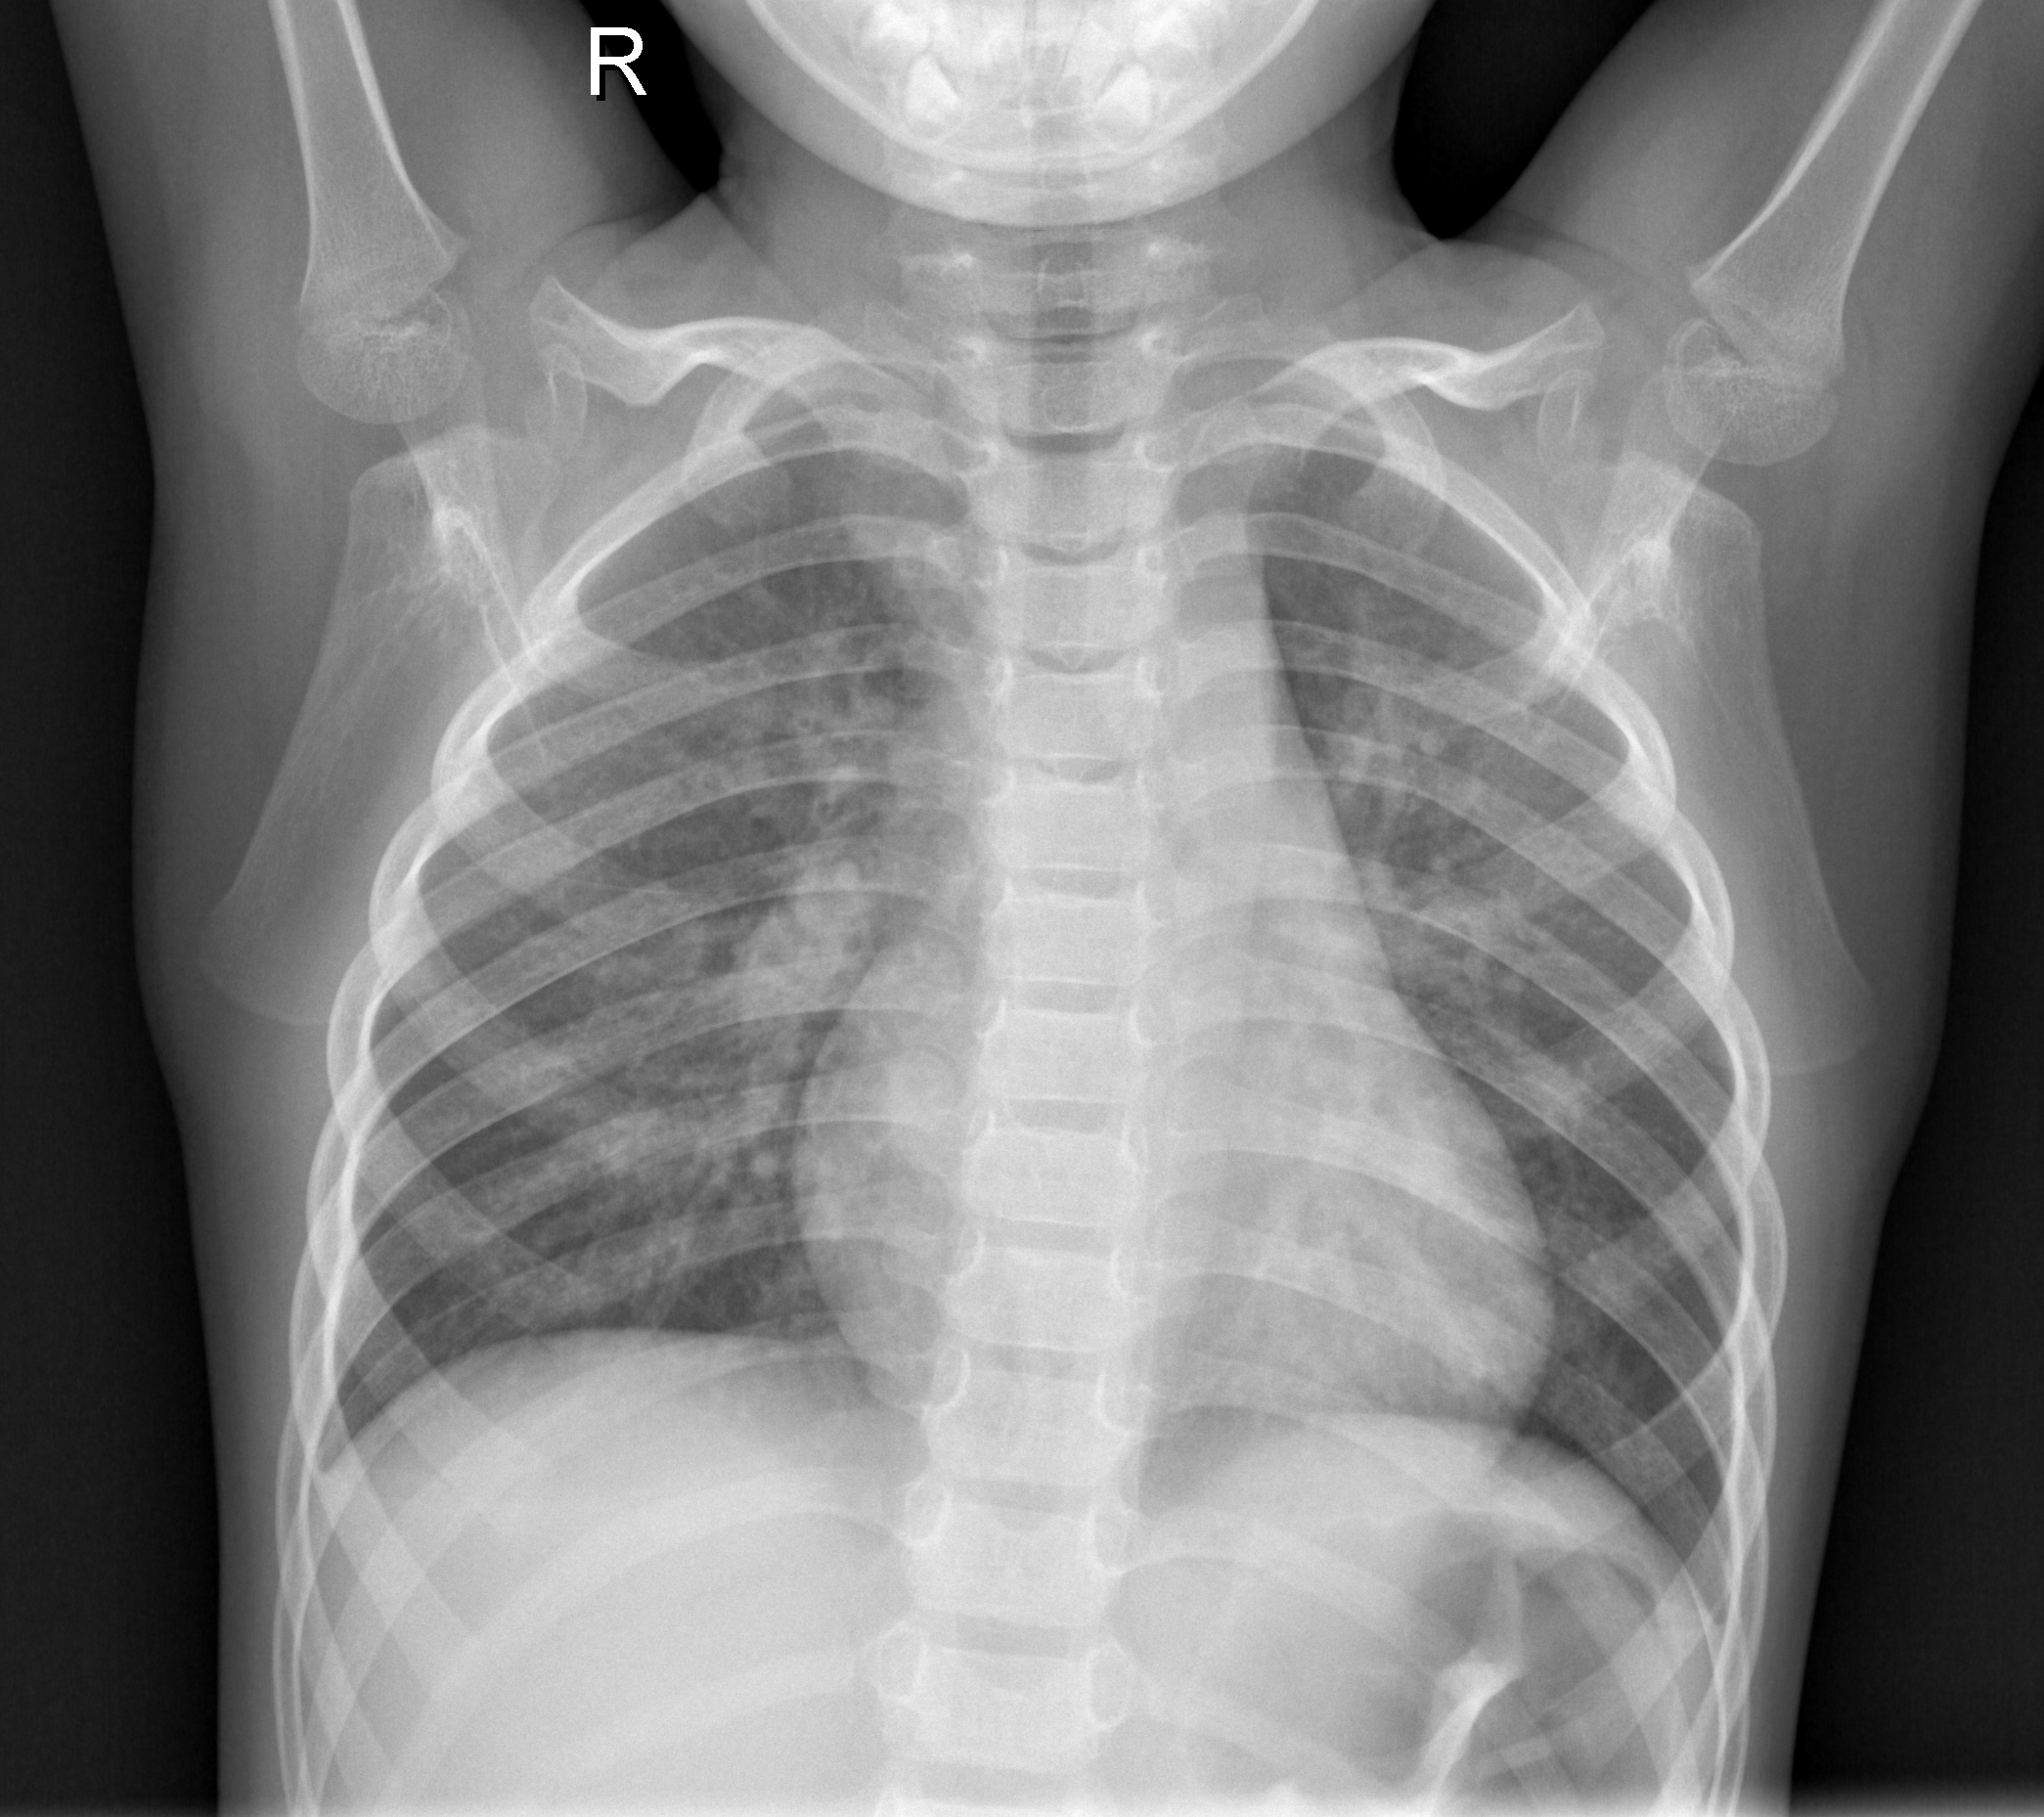

In [444]:
from IPython.display import Image
Image(width=128,height=128,filename='data/train/NORMAL/IM-0115-0001.jpeg') 

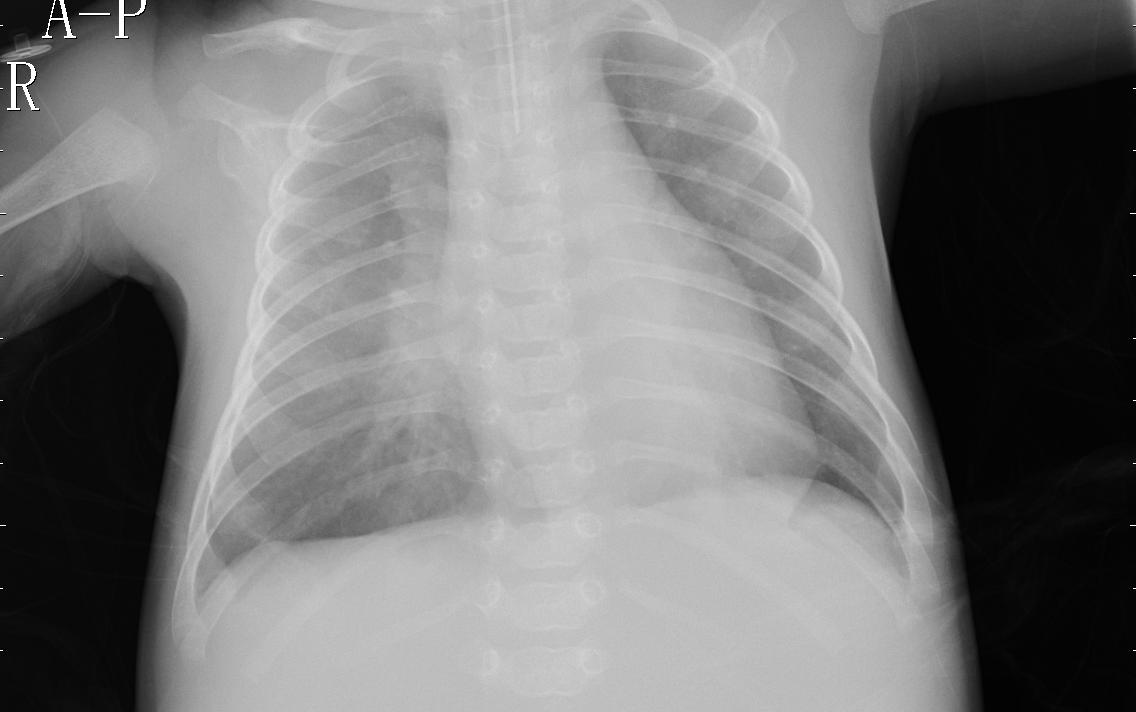

In [447]:
from IPython.display import Image
Image(width=128,height=128,filename='data/train/PNEUMONIA/person1589_bacteria_4171.jpeg') 

### What is a Convolutional Neural Network(CNN)
- __A CNN is a special type of an Artificial Intelligence implementation which uses a special 
mathematical matrix manipulation called the convolution operation to process data from the images.__   
__A convolution does this by multiplying two matrices and yielding a third, smaller matrix.
The Network takes an input image, and uses a filter (or kernel) to create a feature map describing the image.
In the convolution operation, we take a filter (usually 2x2 or 3x3 matrix ) and slide it over the image matrix. The 
coresponding numbers in both matrices are multiplied and and added to yield a single number describing that input space. 
This process is repeated all over the image.This can be seen in the following animation.__

__Few Parameters of CNN that we will be using :__  
    
__MaxPooling2D__ layer is used to add the pooling layers.  
__Flatten__ is the function that converts the pooled feature map to a single column that is passed to the fully connected layer.   
__Dense__ adds the fully connected layer to the neural network.This layer creates a convolution kernel that is convolved with 
the layer input to produce a tensor of outputs. 

### Base Model

In [450]:
cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(150, 150, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, kernel_size=(3, 3), activation="relu",kernel_regularizer=regularizers.l2(0.01)))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 512,kernel_regularizer=regularizers.l2(0.01)))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [451]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_153 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_149 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_150 (MaxPoolin (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_42 (Flatten)         (None, 41472)             0         
_________________________________________________________________
dense_111 (Dense)            (None, 512)               21234176  
_________________________________________________________________
dense_112 (Dense)            (None, 1)                 513       
Total para

In [379]:
cnn_history = cnn.fit_generator(train_generator,
                         steps_per_epoch = 80,
                         epochs = 10,
                         validation_data = test_generator)

# An epoch refers to one cycle through the full training dataset.An epoch is often mixed up with an iteration. 
# Iterations is the number of batches or steps through partitioned packets of the training data, needed to complete one epoch.

Epoch 1/10
80/80 [==============================] - 168s 2s/step - loss: 1.6291 - acc: 0.8219 - val_loss: 0.8270 - val_acc: 0.7596
Epoch 2/10
80/80 [==============================] - 169s 2s/step - loss: 0.4688 - acc: 0.9172 - val_loss: 0.8054 - val_acc: 0.7516
Epoch 3/10
80/80 [==============================] - 174s 2s/step - loss: 0.3735 - acc: 0.9320 - val_loss: 0.7027 - val_acc: 0.7708
Epoch 4/10
80/80 [==============================] - 169s 2s/step - loss: 0.3462 - acc: 0.9367 - val_loss: 0.8187 - val_acc: 0.7356
Epoch 5/10
80/80 [==============================] - 170s 2s/step - loss: 0.2742 - acc: 0.9539 - val_loss: 0.8448 - val_acc: 0.7228
Epoch 6/10
80/80 [==============================] - 176s 2s/step - loss: 0.2860 - acc: 0.9473 - val_loss: 0.8481 - val_acc: 0.7452
Epoch 7/10
80/80 [==============================] - 187s 2s/step - loss: 0.2959 - acc: 0.9398 - val_loss: 0.8492 - val_acc: 0.7372
Epoch 8/10
80/80 [==============================] - 174s 2s/step - loss: 0.2469 - a

In [382]:
history_dict = cnn_history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

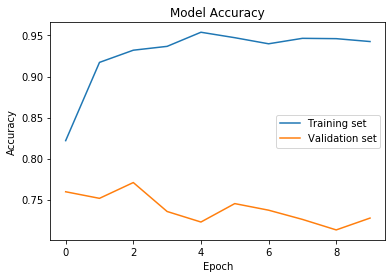

In [383]:
# Accuracy 
plots.acc_plot(cnn_history)

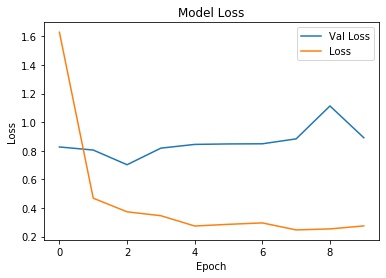

In [454]:
# Loss 
plots.loss_plot(cnn_history)

In [385]:
import datetime
original_start = datetime.datetime.now()
start = datetime.datetime.now()
start = datetime.datetime.now()

In [392]:
# Improving our Base Model
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_data_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),shuffle=True,
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',seed=42)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_data_dir,
                 target_size=(150, 150),  
                 class_mode='binary', 
                 shuffle=False,seed=42)

validation_generator = test_datagen.flow_from_directory(val_data_dir,
                       target_size=(150, 150),
                       batch_size=32,
                       class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


The padding parameter has two values: valid or same. Valid means the input is not zero-padded, so the output of the 
convolution will be smaller than the dimensions of the original image. Same means the input will be zero-padded, so the 
convolution output can be the same size as the input.

For large datasets and deep networks, kernel regularization is a must. You can use either L1 or L2 regularization.
If you detect signs of overfitting, consider using L2 regularization. Tune the amount of regularization, starting with 
values of 0.0001-0.001. For bias and activity, we recommend leaving at the default values for most scenarios

In Keras, you build a CNN architecture using the following process:

1. Reshape the input data into a format suitable for the convolutional layers, using X_train.reshape() and X_test.reshape()

2. For class-based classification, one-hot encode the categories using the to_categorical() function.

3. Build the model using the Sequential.add() function. For a 2D convolutional layer, the command looks like the following.

model.add(Conv2D(64, kernel_size=3, activation=’relu’, input_shape=(28,28,1)))
4. Add a pooling layer, for example using the Sequential.add(MaxPooling2D()) function – not showing all parameters.

5. Add a “flatten” layer which prepares a vector for the fully connected layers, using Sequential.add(Flatten()).

6. Add one or more fully connected layer using Sequential.add(Dense)). Typically you will follow each fully connected layer with a dropout layer (learn more about dropout in our guide to neural network hyperparameters ), using Sequential.add(Dropout)).

7. Compile the model using model.compile()

8. Train the model using model.fit(), supplying X_train() and X_test() which are the source images; y_train() and y_test() which are known classification results.

9. Use model.predict() to generate a prediction.



In [457]:
epochs = 10
batch_size = 32

### Improved Model

In [394]:
#Earlier 2D convolutional layers, closer to the input, learn less filters, while later convolutional layers, closer to the 
#output, learn more filters. The number of filters you select should depend on the complexity of your dataset and the depth 
#of your neural network. A common setting to start with is [32, 64, 128] for three layers, and if there are more layers, 
#increasing to [256, 512]

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same',
                        ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same',
                        ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same',
                        ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same',
                        ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))


# Creating model and compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, mode='min')
    

__checkpoint :__ -Application checkpointing is a fault tolerance technique for long running processes.It is an approach where a snapshot of the state of the system is taken in case of system failure. If there is a problem, not all is lost. The checkpoint may be used directly, or used as the starting point for a new run, picking up where it left off.When training deep learning models,the checkpoint is the weights of the model. These weights can be used to make predictions as is, or used as the basis for ongoing training.

__lr_reduce :__ -Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.  
monitor - quantity to be monitored.  
factor - factor by which the learning rate will be reduced. new_lr = lr * factor  
patience - number of epochs with no improvement after which learning rate will be reduced.  
mode - one of {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; in max mode it will be reduced when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.

__early_stop :__ -the metric to be monitored would be 'loss', and mode would be 'min'.
It will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.
min_delta - Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

In [395]:
new_history = model.fit_generator(train_generator, 
                              steps_per_epoch=train_generator.samples // batch_size, 
                              epochs=epochs, 
                              validation_data=test_generator,callbacks=[checkpoint, lr_reduce],
                              validation_steps=test_generator.samples)

Epoch 1/10
163/163 [==============================] - 295s 2s/step - loss: 0.5906 - acc: 0.7335 - val_loss: 0.6307 - val_acc: 0.6250
Epoch 2/10
163/163 [==============================] - 285s 2s/step - loss: 0.5523 - acc: 0.7416 - val_loss: 0.6613 - val_acc: 0.6250
Epoch 3/10
163/163 [==============================] - 301s 2s/step - loss: 0.4585 - acc: 0.7674 - val_loss: 0.5690 - val_acc: 0.7644
Epoch 4/10
163/163 [==============================] - 304s 2s/step - loss: 0.3455 - acc: 0.8420 - val_loss: 0.3573 - val_acc: 0.8574

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/10
163/163 [==============================] - 311s 2s/step - loss: 0.2670 - acc: 0.8846 - val_loss: 0.3324 - val_acc: 0.8622
Epoch 6/10
163/163 [==============================] - 271s 2s/step - loss: 0.2553 - acc: 0.8917 - val_loss: 0.3092 - val_acc: 0.8750

Epoch 00006: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
Epoch 7/10
163/163 [====================

In [477]:
loss_new,test_accu_new = model.evaluate_generator(test_generator)

In [478]:
print('The testing accuracy is :',test_accu_new*100, '%')
print('The loss is :',loss_new*100, '%')

The testing accuracy is : 88.94230723381042 %
The loss is : 28.884142637252808 %


In [398]:
history_dict = new_history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])

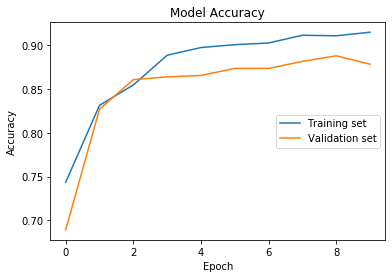

In [399]:
# Accuracy 
plots.acc_plot(new_history)

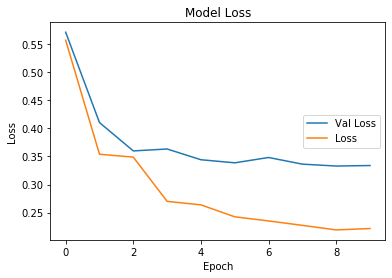

In [400]:
# Loss 
plots.loss_plot(new_history)

In [401]:
model.save('chest_xray_all_with_augmentation_data.h5')

end = datetime.datetime.now()
elapsed = end - start
print('Full data model training and evaluation took a total of:\n {}'.format(elapsed))

Full data model training and evaluation took a total of:
 0:58:57.146860


In [403]:
end = datetime.datetime.now()
elapsed = end - original_start
print('Entire notebook took a total of:\n {}'.format(elapsed))

Entire notebook took a total of:
 0:59:26.140860


In [416]:
# Confusion Matrix and metrics
plots.show_eval(model, new_history, test_generator, test_labels)

CONFUSION MATRIX ------------------
[[203  31]
 [ 38 352]]

TEST METRICS ----------------------
Accuracy: 88.9423076923077%
Precision: 91.90600522193212%
Recall: 90.25641025641026%
F1-score: 91.07373868046572

TRAIN METRIC ----------------------
Train acc: 91.74


Confusion matrix, without normalization
[[203  31]
 [ 38 352]]


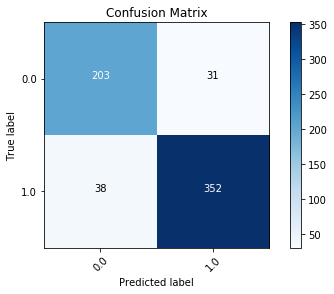

In [425]:
plots.plot_confusion_matrix(model, new_history, test_generator, test_labels)

In [533]:
# get predictions on the val set
y_hat = model.predict(val_images)

img_labels = ['NORMAL', 'PNEUMONIA']

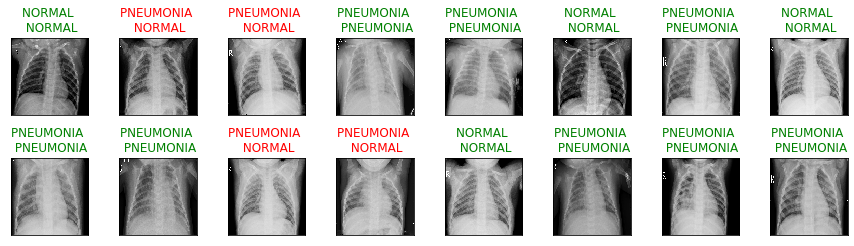

In [547]:
# Checking from Val data set as to how good our model is predicting
fig = plt.figure(figsize=(15, 8))
#fig.tight_layout(hspace=0.2,wspace=0.2)
plt.subplots_adjust(left=0.125,bottom=0.1, 
                    wspace=0.4, hspace=0.35)
for i, idx in enumerate(np.random.choice(val_images.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(val_images[idx]))
    pred_idx = int(np.round(y_hat[idx]))
    true_idx = int(np.round(val_labels[idx]))
    ax.set_title("{} \n {}".format(img_labels[pred_idx], img_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [549]:
plots.show_eval(model, new_history, val_generator, val_labels)

CONFUSION MATRIX ------------------
[[4 4]
 [0 8]]

TEST METRICS ----------------------
Accuracy: 75.0%
Precision: 66.66666666666666%
Recall: 100.0%
F1-score: 80.0

TRAIN METRIC ----------------------
Train acc: 91.74


### Summary

|Model|Loss|Accuracy|Val_Loss|Val_Accuracy|
|-----|----|--------|--------|------------|
|Base Model|0.27|0.94|0.89|0.73|
|Improved Model|0.21|0.92|0.29|0.89|

### Conclusion   
__This study presents a deep CNN based approach for the automatic detection of Pneumonia.__  
__We have demonstrated how to distinguish between Normal and Pneumonia Chest X-Rays with our model having an Accuracy of 89% and a Recall of 90%__  
__We constucted a Convolutional Neural Network model from scratch to extract features from a given Chest X-Ray image and 
classify it to determine if a person is infected with Pneumonia.__  

### Recommendations:
__Incorporate our model to see how it works in hospitals so that it can assist health professionals diagnose patients with
Pneumonia. Ofcourse these reports have to be validated. This is not the ultimate test. This needs to be certified by health
professionals.  
This model should be run under the supervision of a radiologist to enhance accuracy/recall to improve treatment outcomes 
which will increase hospitals' ratings and fundings.__

### Future Work
__We need more data to run our validation set on so that we can be sure of the way the model is predicting.__  